# Pregunta 1

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sin
import warnings
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (14, 10)

In [17]:
from math import cos,sin
import scipy
from sympy import *
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.5.3-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [18]:
A = -0.0015
B = 31.6
def f_T(x, r):
    return 4*r*x*(1.-x)*(1 + A*sin(B*x))

In [19]:
x = Symbol('x')
r = 0.7

In [20]:
y = f_T(x,r)
y

In [21]:
# calculo de derivadas
# Primera derivada
y1 = diff(y,x)
# Segunda derivada
y2 = diff(y1,x)
# Tercera derivada
y3 = diff(y2,x)
# Cuarta derivada
y4 = diff(y3,x)
# Quinta derivada
y5 = diff(y4,x)

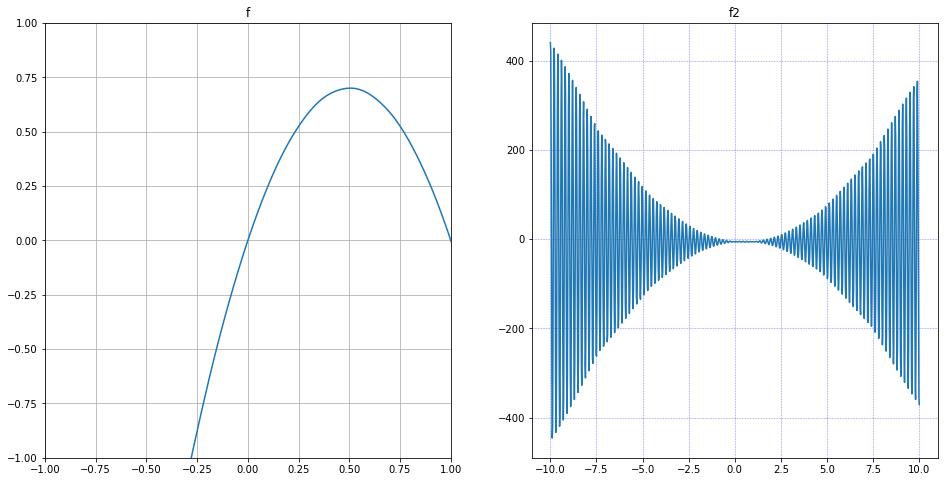

In [22]:
from sympy import lambdify
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16,8)

f = lambdify(x, y, 'numpy')
f2 = lambdify(x, y2, 'numpy')

x_vals = np.linspace(-10, 10, 1000)
y_vals = f(x_vals)
y2_vals = f2(x_vals)


fig, axes = plt.subplots(1, 2)

# default grid appearance
axes[0].plot(x_vals,y_vals)
axes[0].set_title('f')
axes[0].set_xlim(-1,1)
axes[0].set_ylim(-1,1)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x_vals,y2_vals)
axes[1].set_title('f2')
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.savefig('f.png')
plt.show()

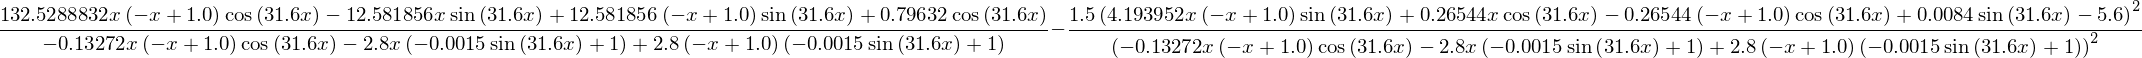

In [23]:
res = (y3/y1) - (3/2)*(y2/y1)**2
res

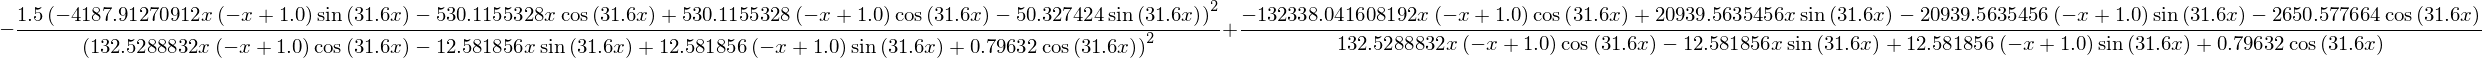

In [24]:
res2 = (y5/y3) - (3/2)*(y4/y3)**2
res2

In [25]:
f = lambdify(x, res, 'numpy')

In [26]:
f2 = lambdify(x, res2,'numpy')

In [27]:
f2(1)

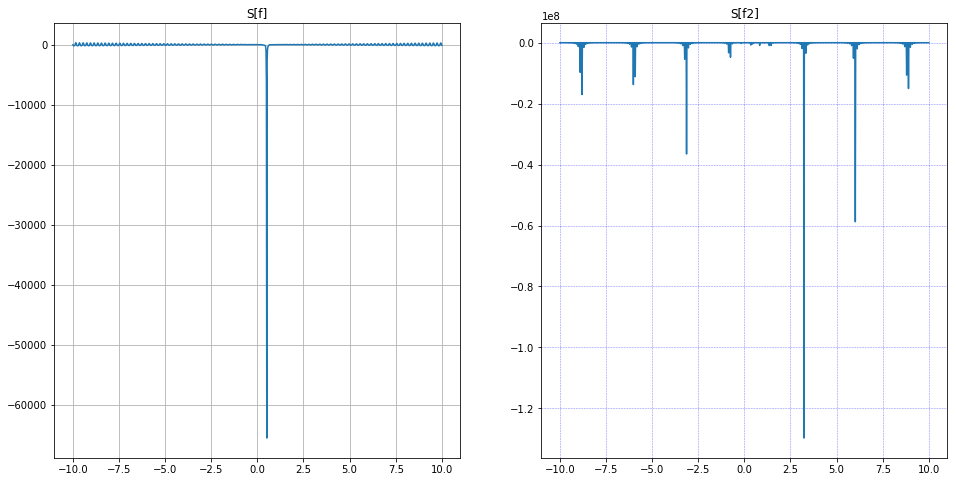

In [28]:
from sympy import lambdify
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16,8)

x_vals = np.linspace(-10, 10, 1000)
y_vals = f(x_vals)
y2_vals = f2(x_vals)


fig, axes = plt.subplots(1, 2)

# default grid appearance
axes[0].plot(x_vals,y_vals)
axes[0].set_title('S[f]')
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x_vals,y2_vals)
axes[1].set_title('S[f2]')
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.savefig('s.png')
plt.show()

## Gráfica del atractor

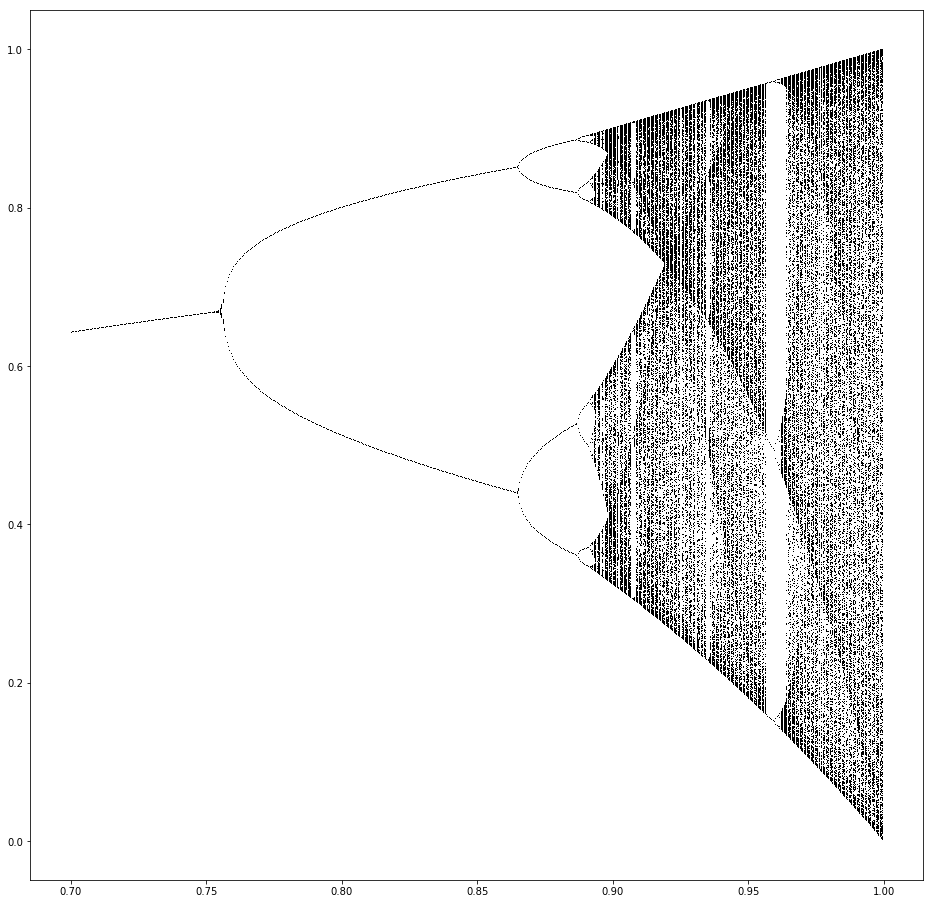

In [32]:
def f_T(x, r):
    A=-0.0015
    B=31.6
    with np.errstate(invalid='ignore'):
        return 4*r*x*(1.-x)*(1+A*np.sin(B*x))

def Iterate(g, x0, N, args=()):
    for i in range(N):
        x0 = g(x0, *args)
    return x0

def IterateList(g, x0, N, args=()):
    xs = [x0]
    for i in range(N-1):
        x0 = g(x0, *args)
        xs.append(x0)
    return xs


def grafica_atractor(g, x0, a, b, rango, showPlot=True):
    etaMatrix = []
    xMatrix = []
    for i in rango:
        etaMatrix.append([i]*b)
        xMatrix.append(IterateList(g, Iterate(g, x0, a, (i,)),b, (i,)))
    plt.plot(etaMatrix, xMatrix, 'k,')
    if showPlot: 
        plt.savefig('atractp.png')
        plt.show()
        
plt.rcParams['figure.figsize'] = (16,16)


l1 = np.arange(0.7, 1.0000, 0.0005)
t = 0.1
n_it = 500

grafica_atractor(f_T, t, n_it, n_it, l1)

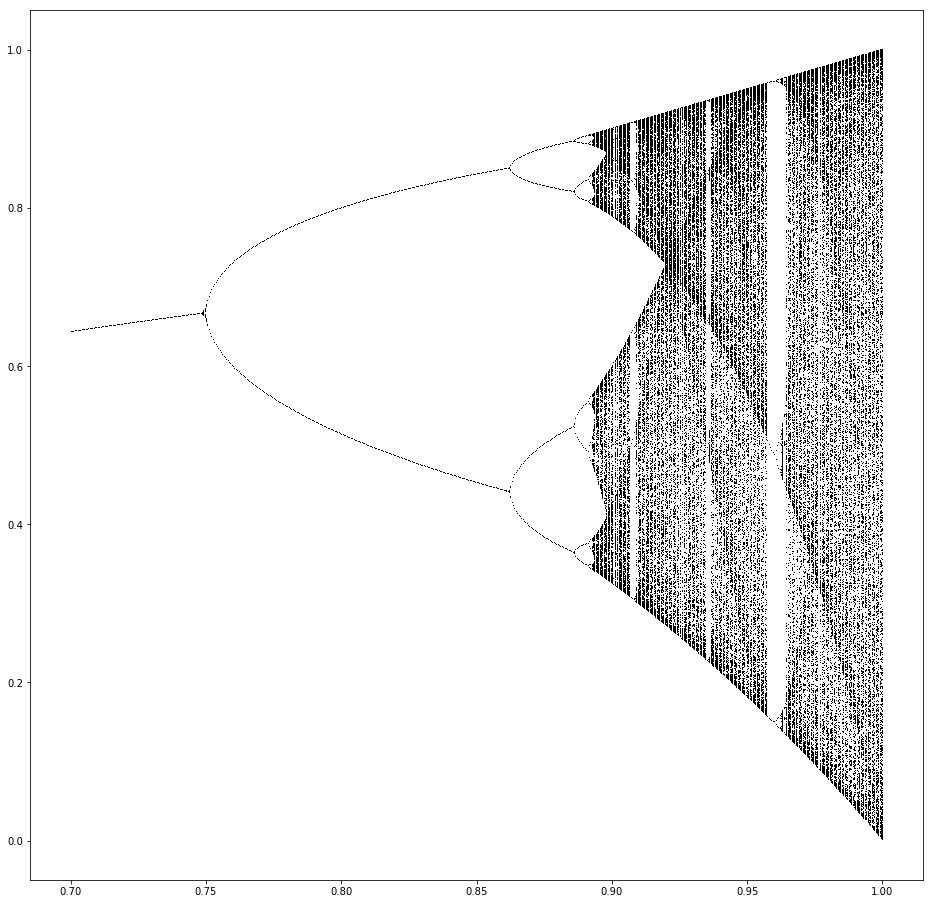

In [33]:
def f_T(x, r):
    return 4*r*x*(1.-x)

def Iterate(g, x0, N, args=()):
    for i in range(N):
        x0 = g(x0, *args)
    return x0

def IterateList(g, x0, N, args=()):
    xs = [x0]
    for i in range(N-1):
        x0 = g(x0, *args)
        xs.append(x0)
    return xs


def grafica_atractor(g, x0, a, b, rango, showPlot=True):
    etaMatrix = []
    xMatrix = []
    for i in rango:
        etaMatrix.append([i]*b)
        xMatrix.append(IterateList(g, Iterate(g, x0, a, (i,)),b, (i,)))
    plt.plot(etaMatrix, xMatrix, 'k,')
    if showPlot: 
        plt.savefig('atrac.png')
        plt.show()
        
        
plt.rcParams['figure.figsize'] = (16,16)


l1 = np.arange(0.7, 1.0000, 0.0005)
t = 0.1
n_it = 500

grafica_atractor(f_T, t, n_it, n_it, l1)

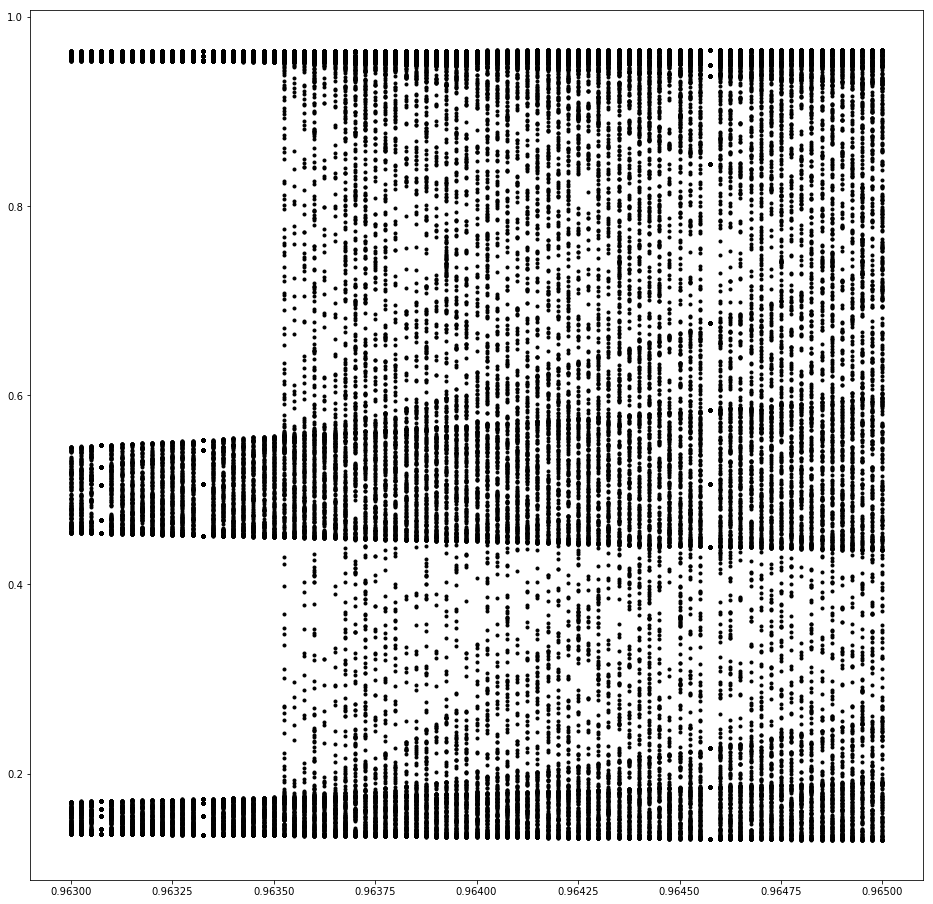

In [40]:
def f_T(x, r):
    A=-0.0015
    B=31.6
    with np.errstate(invalid='ignore'):
        return 4*r*x*(1.-x)*(1+A*np.sin(B*x))

def Iterate(g, x0, N, args=()):
    for i in range(N):
        x0 = g(x0, *args)
    return x0

def IterateList(g, x0, N, args=()):
    xs = [x0]
    for i in range(N-1):
        x0 = g(x0, *args)
        xs.append(x0)
    return xs


def grafica_atractor(g, x0, a, b, rango, showPlot=True):
    etaMatrix = []
    xMatrix = []
    for i in rango:
        etaMatrix.append([i]*b)
        xMatrix.append(IterateList(g, Iterate(g, x0, a, (i,)),b, (i,)))
    plt.plot(etaMatrix, xMatrix, 'k.')
    if showPlot: 
        plt.savefig('a.png')
        plt.show()
        
plt.rcParams['figure.figsize'] = (16,16)


l3 = np.arange(0.963, 0.965, 0.000025)
t = 0.1
n_it = 500

grafica_atractor(f_T, t, n_it, n_it, l1)

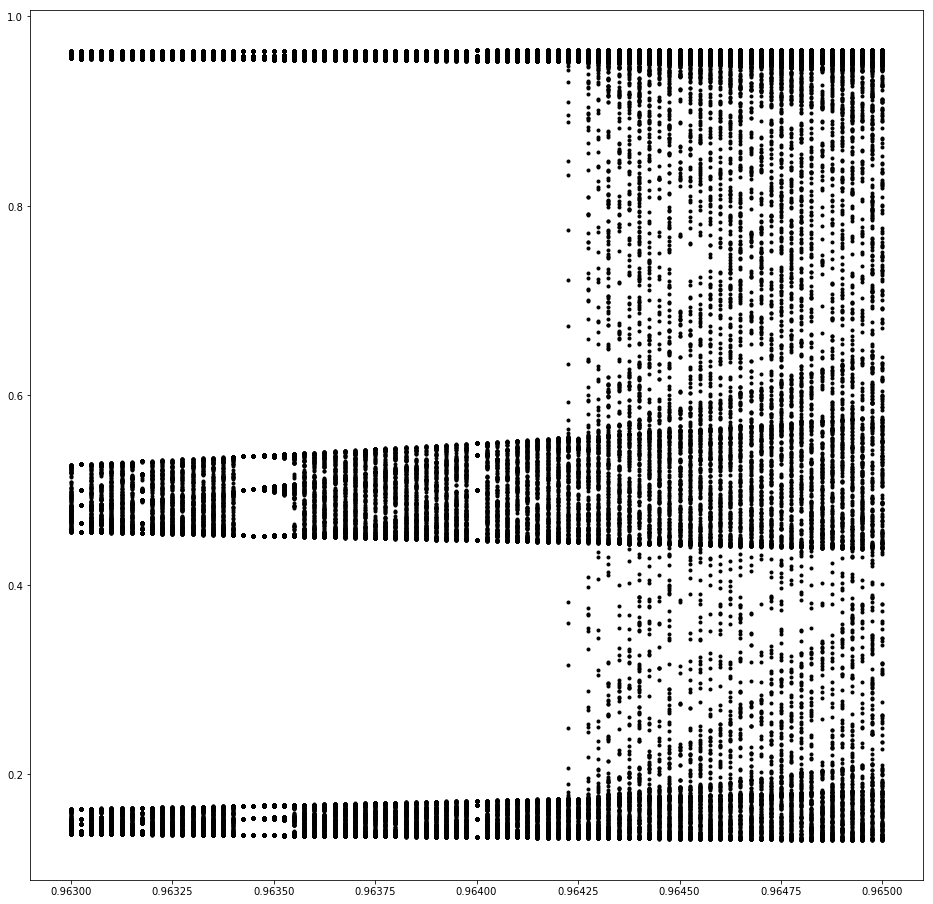

In [41]:
def f_T(x, r):
        return 4*r*x*(1.-x)

def Iterate(g, x0, N, args=()):
    for i in range(N):
        x0 = g(x0, *args)
    return x0

def IterateList(g, x0, N, args=()):
    xs = [x0]
    for i in range(N-1):
        x0 = g(x0, *args)
        xs.append(x0)
    return xs


def grafica_atractor(g, x0, a, b, rango, showPlot=True):
    etaMatrix = []
    xMatrix = []
    for i in rango:
        etaMatrix.append([i]*b)
        xMatrix.append(IterateList(g, Iterate(g, x0, a, (i,)),b, (i,)))
    plt.plot(etaMatrix, xMatrix, 'k.')
    if showPlot: 
        plt.savefig('b.png')
        plt.show()
        
plt.rcParams['figure.figsize'] = (16,16)


l1 = np.arange(0.963, 0.965, 0.000025)
t = 0.1
n_it = 500

grafica_atractor(f_T, t, n_it, n_it, l1)

In [77]:
c1 = 0.95
c2 = 0.9916

def f(x):
    return 7.86*x - 23.31*(x**2) + 28.75*(x**3) - 13.3*(x**4)

x = Symbol('x')

y = f(x)
y

In [78]:
y1 = c1*f(x)
y1

In [83]:
dy1 = diff(y1,x)
dy1

### Estabilidad

In [81]:
ecu = Eq(y1-x, 0)
solve(ecu)

In [86]:
dy1.evalf(subs={x:0.706126442005428})

In [79]:
y2 = c2*f(x)
y2

In [89]:
dy2 = diff(y2,x)
dy2

In [90]:
ecu2 = Eq(y2-x, 0)
solve(ecu2)

In [91]:
dy2.evalf(subs={x:0.723134058401399})

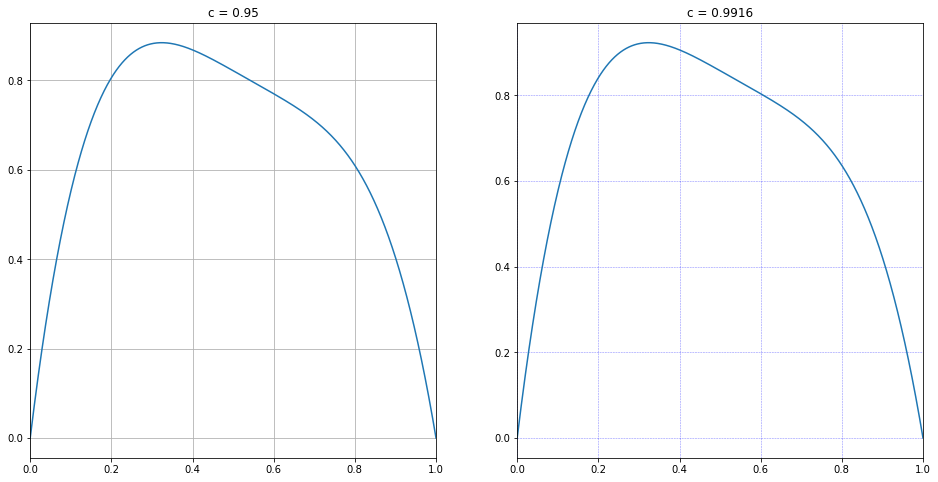

In [72]:
from sympy import lambdify
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16,8)

f = lambdify(x, y1, 'numpy')
f2 = lambdify(x, y2, 'numpy')

x_vals = np.linspace(0.0, 1.0, 1000)
y_vals = f(x_vals)
y2_vals = f2(x_vals)


fig, axes = plt.subplots(1, 2)

# default grid appearance
axes[0].plot(x_vals,y_vals)
axes[0].set_title('c = 0.95')
axes[0].set_xlim(0,1)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x_vals,y2_vals)
axes[1].set_title('c = 0.9916')
axes[1].set_xlim(0,1)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.savefig('11.png')
plt.show()

In [73]:
y1d = diff(y,x)
y2d = diff(y1d,x)
# Segunda derivada
y2d

In [74]:
a = y2d*c1
a

In [92]:
der1 = diff(a,x)
der1

In [96]:
ecu = Eq(a-x, 0)
solve(ecu)

In [ ]:
dy1.evalf(subs={x:0.706126442005428})

In [75]:
b = y2d*c2
b

In [98]:
ecu = Eq(b-x, 0)
solve(ecu)

In [93]:
der2 = diff(b,x)
der2

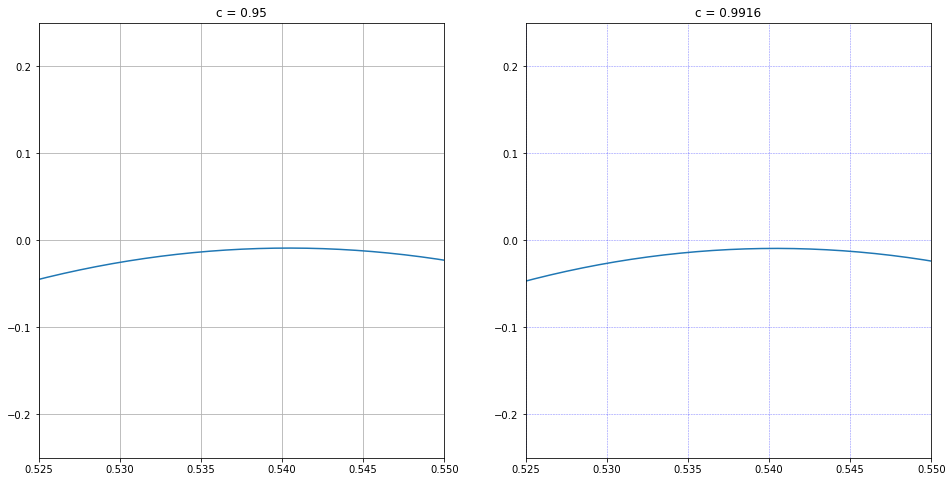

In [102]:
from sympy import lambdify
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (16,8)

f = lambdify(x, a, 'numpy')
f2 = lambdify(x, b, 'numpy')

x_vals = np.linspace(0.0, 1.0, 1000)
y_vals = f(x_vals)
y2_vals = f2(x_vals)


fig, axes = plt.subplots(1, 2)

# default grid appearance
axes[0].plot(x_vals,y_vals)
axes[0].set_title('c = 0.95')
axes[0].set_xlim(0.525,0.550)
axes[0].set_ylim(-0.25,0.25)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x_vals,y2_vals)
axes[1].set_title('c = 0.9916')
axes[1].set_xlim(0.525,0.550)
axes[1].set_ylim(-0.25,0.25)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.savefig('13.png')
plt.show()

# Pregunta 2 - Gráficas de los N cuerpos

In [130]:
import pandas as pd

head= ['x','y']
head2 = ['t','EK','EP','EM']

b1 = pd.read_table('1/Cuerpo3.txt',sep='  ')
b2 = pd.read_table('1/Cuerpo4.txt',sep='  ')
b3 = pd.read_table('1/Cuerpo5.txt',sep='  ')
b4 = pd.read_table('1/energia.txt',sep='  ',names=head2)

c1 = pd.read_table('2/Cuerpo3.txt',sep='  ',names=head)
c2 = pd.read_table('2/Cuerpo4.txt',sep='  ',names=head)
c3 = pd.read_table('2/Cuerpo5.txt',sep='  ',names=head)
c4 = pd.read_table('2/energia.txt',sep='  ',names=head2)

d1 = pd.read_table('3/Cuerpo3.txt',sep='  ',names=head)
d2 = pd.read_table('3/Cuerpo4.txt',sep='  ',names=head)
d3 = pd.read_table('3/Cuerpo5.txt',sep='  ',names=head)
d4 = pd.read_table('3/energia.txt',sep='  ',names=head2)

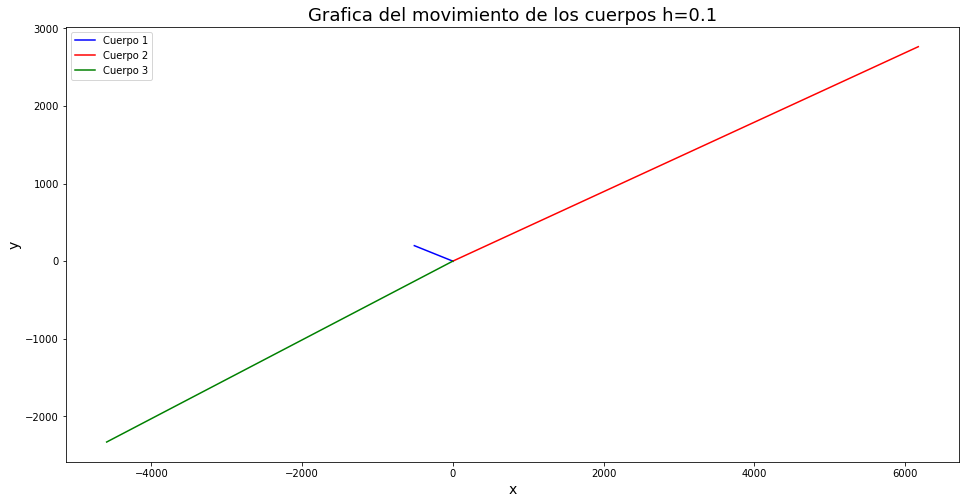

In [187]:
fig, ax = plt.subplots()

ax.plot(b1['x'],b1['y'],'b',label="Cuerpo 1") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(b2['x'],b2['y'],'r',label="Cuerpo 2") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(b3['x'],b3['y'],'g',label="Cuerpo 3") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
#ax.set_xlim(-100,100)
ax.set_title('Grafica del movimiento de los cuerpos h=0.1', fontsize=18);
fig.savefig('mov1.png')

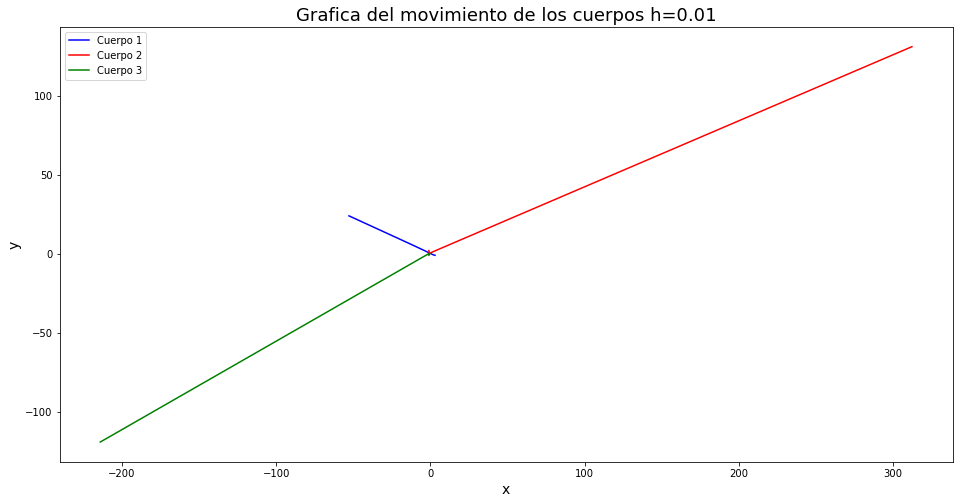

In [188]:
fig, ax = plt.subplots()

ax.plot(c1['x'],c1['y'],'b',label="Cuerpo 1") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(c2['x'],c2['y'],'r',label="Cuerpo 2") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(c3['x'],c3['y'],'g',label="Cuerpo 3") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Grafica del movimiento de los cuerpos h=0.01', fontsize=18);
fig.savefig('mov2.png')

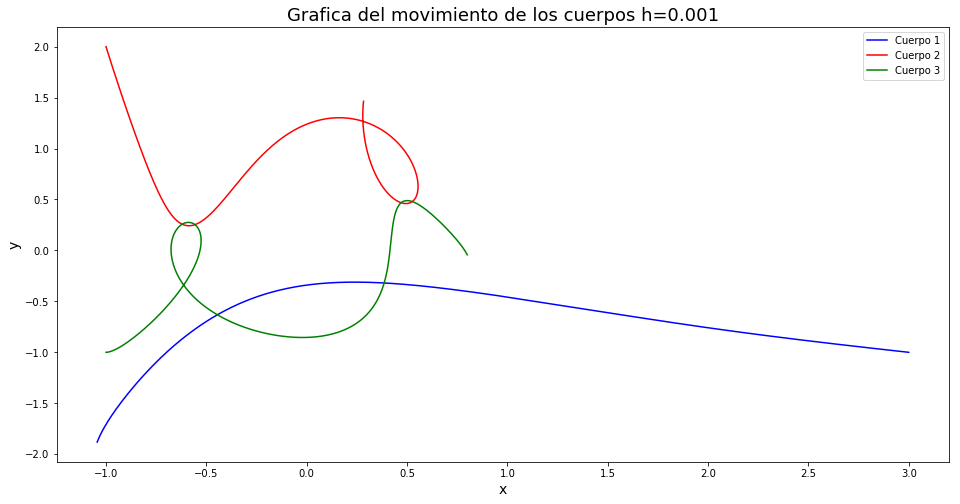

In [192]:
fig, ax = plt.subplots()

ax.plot(d1['x'],d1['y'],'b',label="Cuerpo 1") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(d2['x'],d2['y'],'r',label="Cuerpo 2") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(d3['x'],d3['y'],'g',label="Cuerpo 3") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Grafica del movimiento de los cuerpos h=0.001', fontsize=18);
fig.savefig('mov3.png')

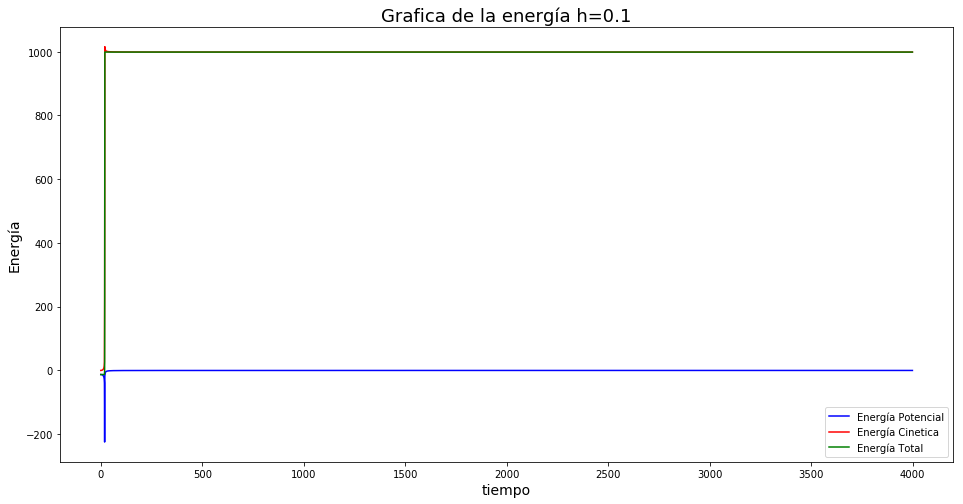

In [193]:
fig, ax = plt.subplots()

ax.plot(b4['t'],b4['EP'],'b',label="Energía Potencial") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(b4['t'],b4['EK'],'r',label="Energía Cinetica") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(b4['t'],b4['EM'],'g',label="Energía Total") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('tiempo', fontsize=14)
ax.set_ylabel('Energía', fontsize=14)
ax.set_title('Grafica de la energía h=0.1', fontsize=18);
fig.savefig('ener1.png')

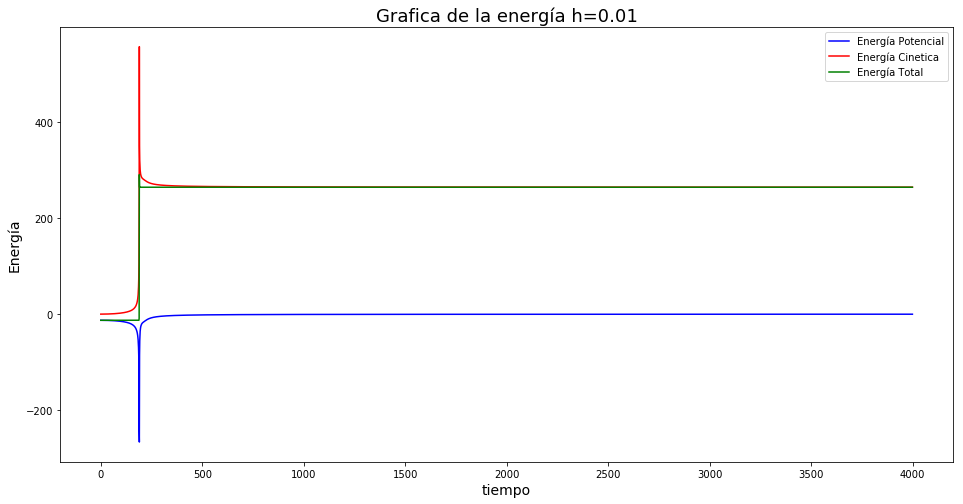

In [194]:
fig, ax = plt.subplots()

ax.plot(c4['t'],c4['EP'],'b',label="Energía Potencial") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(c4['t'],c4['EK'],'r',label="Energía Cinetica") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(c4['t'],c4['EM'],'g',label="Energía Total") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('tiempo', fontsize=14)
ax.set_ylabel('Energía', fontsize=14)
ax.set_title('Grafica de la energía h=0.01', fontsize=18);
fig.savefig('ener2.png')

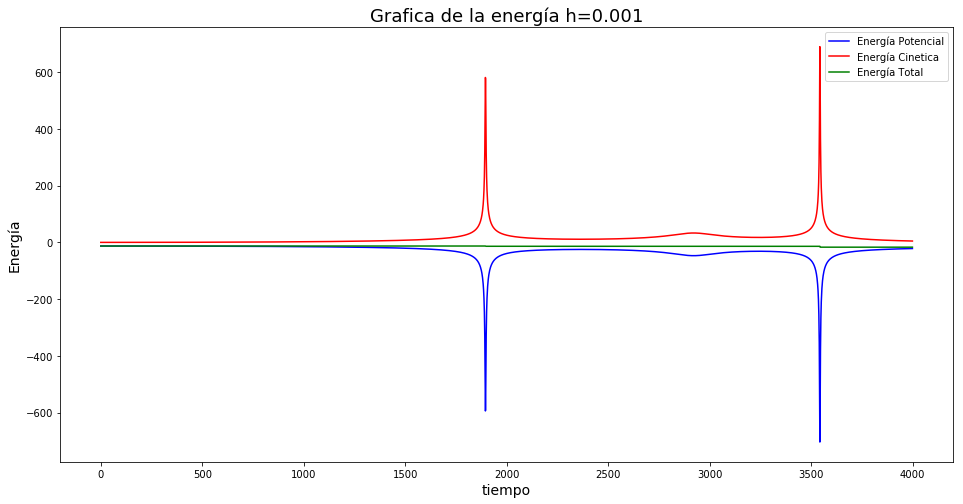

In [195]:
fig, ax = plt.subplots()

ax.plot(d4['t'],d4['EP'],'b',label="Energía Potencial") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(d4['t'],d4['EK'],'r',label="Energía Cinetica") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(d4['t'],d4['EM'],'g',label="Energía Total") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('tiempo', fontsize=14)
ax.set_ylabel('Energía', fontsize=14)
ax.set_title('Grafica de la energía h=0.001', fontsize=18);
fig.savefig('ener3.png')

In [197]:
import pandas as pd

head= ['x','y']

m1 = pd.read_table('a/Cuerpo3.txt',sep='  ',names=head)
m2 = pd.read_table('a/Cuerpo4.txt',sep='  ',names=head)
m3 = pd.read_table('a/Cuerpo5.txt',sep='  ',names=head)

n1 = pd.read_table('b/Cuerpo3.txt',sep='  ',names=head)
n2 = pd.read_table('b/Cuerpo4.txt',sep='  ',names=head)
n3 = pd.read_table('b/Cuerpo5.txt',sep='  ',names=head)

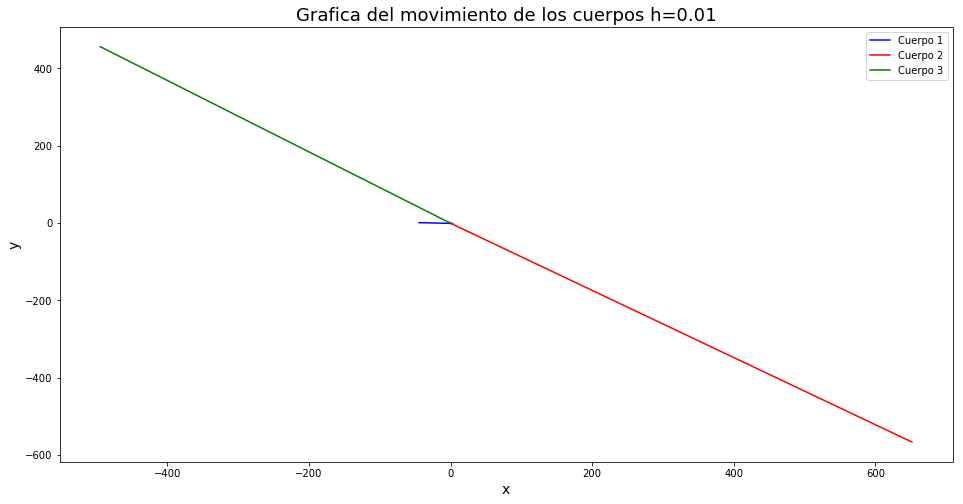

In [200]:
fig, ax = plt.subplots()

ax.plot(m1['x'],m1['y'],'b',label="Cuerpo 1") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(m2['x'],m2['y'],'r',label="Cuerpo 2") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(m3['x'],m3['y'],'g',label="Cuerpo 3") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Grafica del movimiento de los cuerpos h=0.01', fontsize=18);
fig.savefig('f1.png')

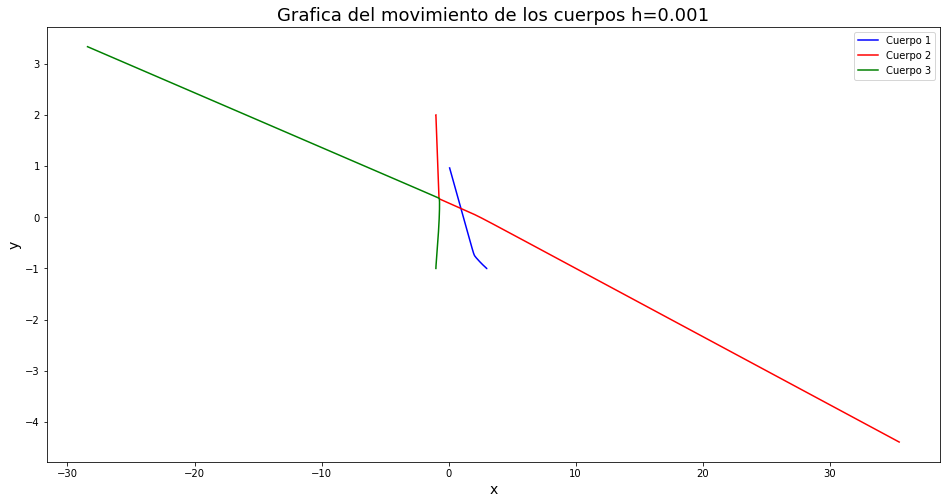

In [201]:
fig, ax = plt.subplots()

ax.plot(n1['x'],n1['y'],'b',label="Cuerpo 1") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(n2['x'],n2['y'],'r',label="Cuerpo 2") # Usamos la r para que sea un raw string de esa manera evitamos errores
ax.plot(n3['x'],n3['y'],'g',label="Cuerpo 3") # Usamos la r para que sea un raw string de esa manera evitamos errores

ax.legend() # upper left corner
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Grafica del movimiento de los cuerpos h=0.001', fontsize=18);
fig.savefig('f2.png')